In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ("ignore")

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
data.shape

(50, 5)

In [7]:
#unique objetc values
data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

## data preprocessing

In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
data.agg(["skew","kurtosis","var","median"])

,R&D Spend,Administration,Marketing Spend,Profit
skew,1.640022e-01,-4.890248e-01,-4.647227e-02,2.329102e-02
kurtosis,-7.614646e-01,2.250711e-01,-6.717011e-01,-6.385889e-02
var,2.107017e+09,7.849973e+08,1.495492e+10,1.624588e+09
median,7.305108e+04,1.226998e+05,2.127162e+05,1.079782e+05


In [11]:
#cheking if any null values are present
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
#renaming the columns
data.rename(columns = {"R&D Spend": "R_D","Administration":"admin","Marketing Spend": "MS"},inplace = True)

In [13]:
#one hot encoding on object by using get_dummies
data = pd.get_dummies(data)

#### Checking correlation between columns

In [14]:
data.corr()

,R_D,admin,MS,Profit,State_California,State_Florida,State_New York
R_D,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


- The correlation matrix shows that state_New York column has very low correlation with respect to target variable.So we can drop this column.

In [15]:
data.drop("State_New York",axis =1 ,inplace = True)

In [16]:
#checking if dataset contains any duplicated values
data[data.duplicated()] #no duplicated values

,R_D,admin,MS,Profit,State_California,State_Florida


In [17]:
#renaming newly genereted columns
data.rename(columns={"State_California":"cal","State_Florida":"flo"},inplace = True)

In [18]:
data.dtypes

R_D       float64
admin     float64
MS        float64
Profit    float64
cal         uint8
flo         uint8
dtype: object

In [19]:
#converting one hot encoded columns to int32 for better use
data["cal"] = data["cal"].astype(int)
data["flo"] = data["flo"].astype(int)

In [20]:
data.dtypes

R_D       float64
admin     float64
MS        float64
Profit    float64
cal         int32
flo         int32
dtype: object

## Data Visualization

In [21]:
sns.set_style(style = "darkgrid")

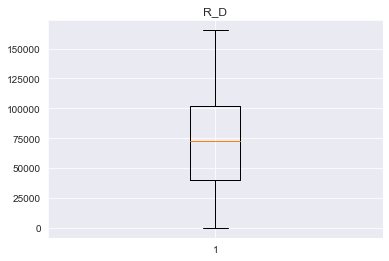

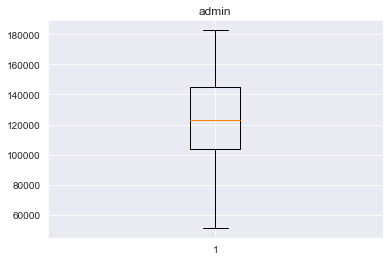

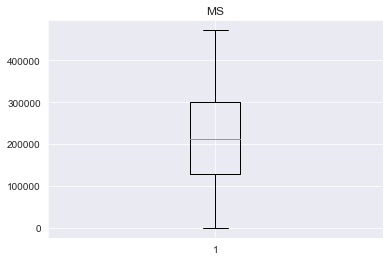

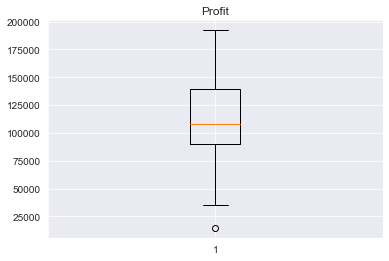

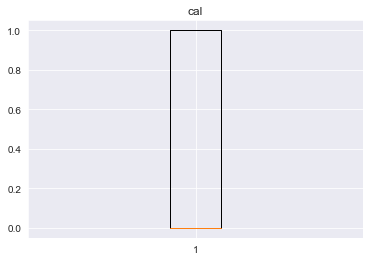

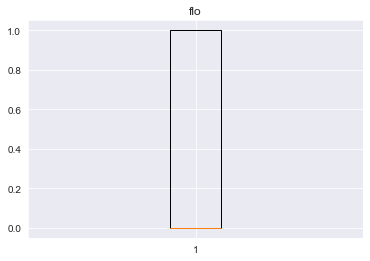

In [22]:
#boxplot visualization
for i in data:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

- Target variable profit conatis one outlier which is based on the profit of the company so we can neglect it.

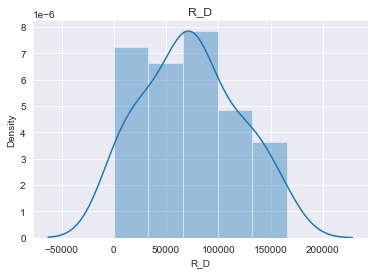

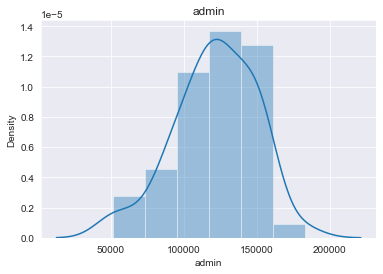

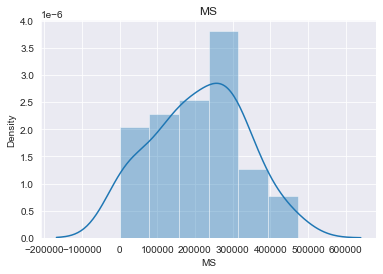

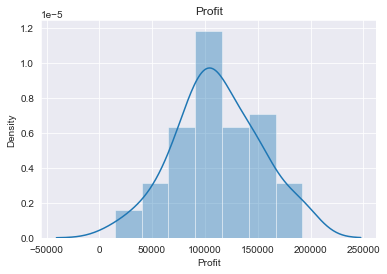

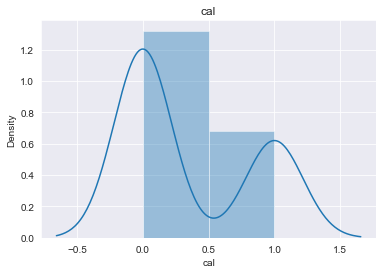

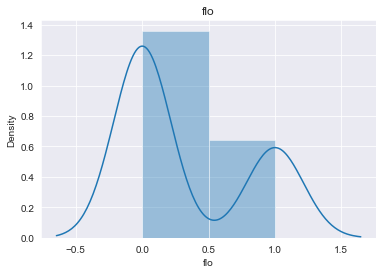

In [23]:
#histogram visualization
for i in data:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

### Scatter plot of each feature with respect to target variable

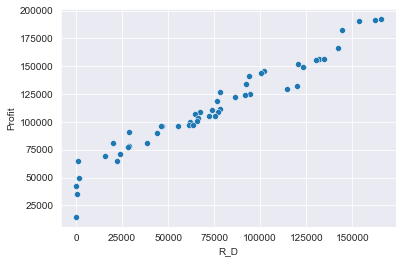

In [24]:
sns.scatterplot(x = "R_D", y = "Profit", data = data)
plt.show()

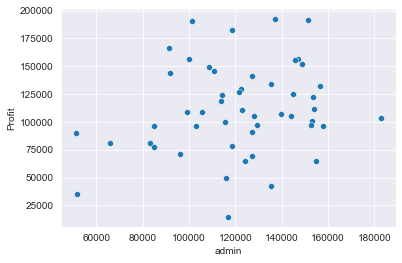

In [25]:
sns.scatterplot(x = "admin", y = "Profit", data = data)
plt.show()

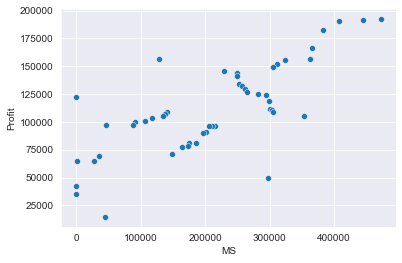

In [26]:
sns.scatterplot(x = "MS", y = "Profit", data = data)
plt.show()

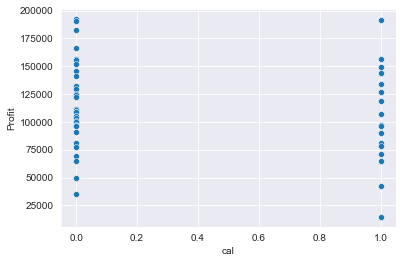

In [27]:
sns.scatterplot(x = "cal", y = "Profit", data = data)
plt.show()

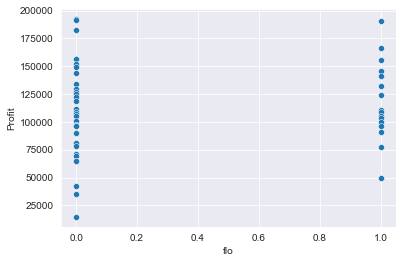

In [28]:
sns.scatterplot(x = "flo", y = "Profit", data = data)
plt.show()

#### Pairplot

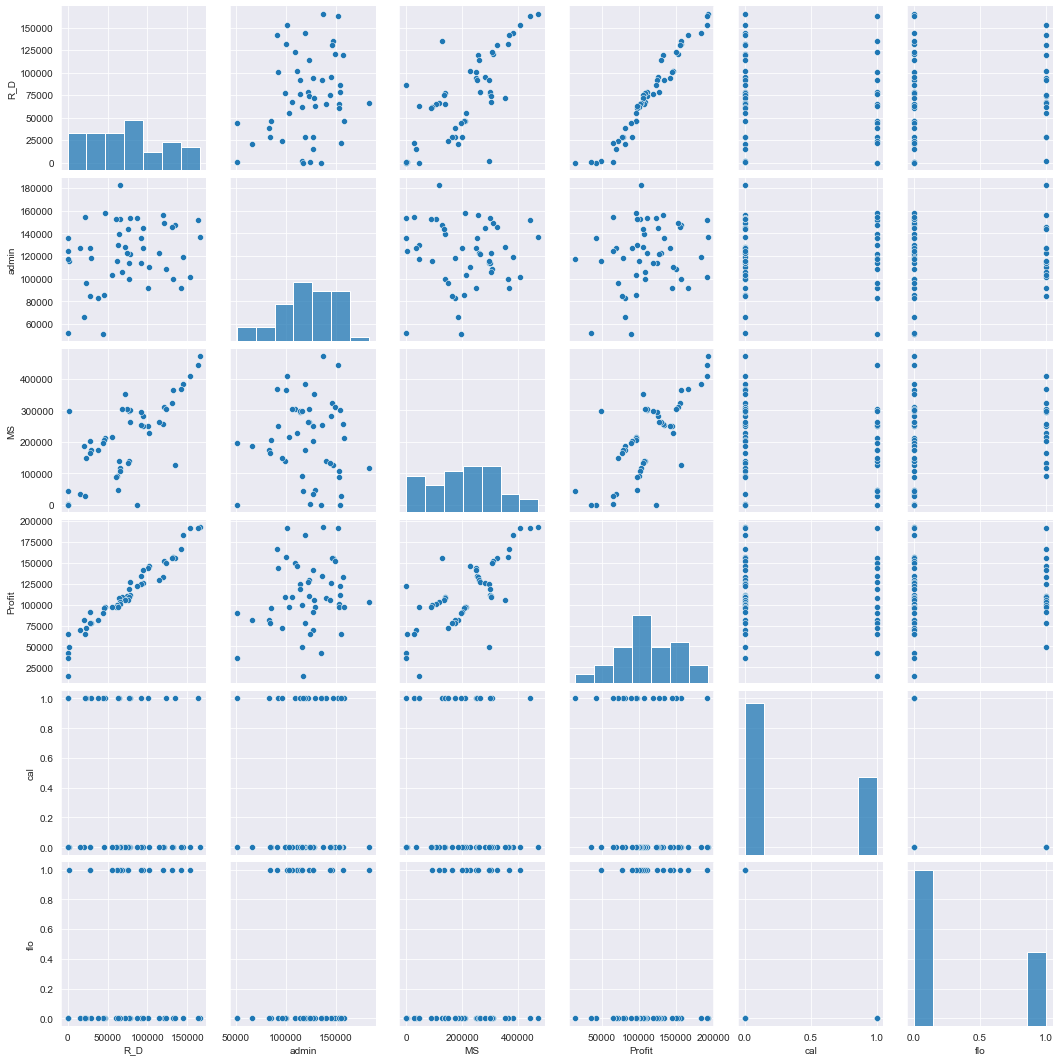

In [29]:
sns.pairplot(data)

## Building model

### By using train test split

In [30]:
X = data[['R_D', 'admin', 'MS', 'cal', 'flo']]
y = data["Profit"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 40)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([ 97886.52854499, 100689.5975341 ,  50766.18448362,  66829.09134763,
        46799.45010514, 189232.29587138, 128691.24829837, 170348.90916988,
       135737.68395097, 180434.308916  ])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"mse: {mse},\nrmse: {rmse},\nr2_score: {r2}")

mse: 207075894.9544528,
rmse: 14390.13186021771,
r2_score: 0.9297662471348861


### Implementing ols method

In [35]:
import statsmodels.formula.api as smf
model1 = smf.ols("Profit~R_D+admin+MS+cal+flo",data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.34e-27
Time:                        11:33:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R_D            0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
cal           41.8870   3256.039      0.013      0.990   -6520.229    6604.003
flo          240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Models (each feature with respect to target variable)

In [36]:
ml_rd = smf.ols("Profit~R_D",data = data).fit()
ml_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           3.50e-32
Time:                        11:33:13   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_D            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
ml_admin = smf.ols("Profit~admin",data = data).fit()
ml_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 16 Sep 2022   Prob (F-statistic):              0.162
Time:                        11:33:13   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
ml_ms = smf.ols("Profit~MS",data = data).fit()
ml_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           4.38e-10
Time:                        11:33:14   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
ml_cal = smf.ols("Profit~cal",data = data).fit()
ml_cal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 16 Sep 2022   Prob (F-statistic):              0.312
Time:                        11:33:14   Log-Likelihood:                -600.12
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.162e+05   7013.324     16.567      0.000    1.02e+05     1.3e+05
cal        -1.228e+04    1.2e+04     -1.021      0.312   -3.65e+04    1.19e+04
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
ml_flo = smf.ols("Profit~flo",data = data).fit()
ml_flo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Fri, 16 Sep 2022   Prob (F-statistic):              0.421
Time:                        11:33:14   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
flo         9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF

In [41]:
rsq_rd = smf.ols("R_D~admin+MS+cal+flo",data = data).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_admin = smf.ols("admin~R_D+MS+cal+flo",data = data).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_MS = smf.ols("MS~R_D+admin+cal+flo",data = data).fit().rsquared
vif_MS = 1/(1-rsq_MS)

rsq_cal = smf.ols("cal~R_D+MS+admin+flo",data = data).fit().rsquared
vif_cal = 1/(1-rsq_cal)

rsq_flo = smf.ols("flo~R_D+MS+cal+admin",data = data).fit().rsquared
vif_flo = 1/(1-rsq_flo)

print(f"vif_rd: {vif_rd},\nvif_admin: {vif_admin},\nvif_MS: {vif_MS},\nvif_cal: {vif_cal},\nvif_flo: {vif_flo}")

vif_rd: 2.4955109215494433,
vif_admin: 1.1777660508993841,
vif_MS: 2.4167967566863933,
vif_cal: 1.3350608769628545,
vif_flo: 1.3612992664384325


#### creating dataframe of vif scores for better understanding

In [42]:
df = {"variable":["R_D","admin","MS","cal","flo"],"vif":[vif_rd,vif_admin,vif_MS,vif_cal,vif_flo]}
vif = pd.DataFrame(df)
vif

,variable,vif
0,R_D,2.495511
1,admin,1.177766
2,MS,2.416797
3,cal,1.335061
4,flo,1.361299


VIF = 1 (Not correlated) 1 < VIF < 5 (Moderately correlated) VIF >=5 (Highly correlated)

- Here, we can consider this features for model generation because,as per the vif scores featires are not highly correlated to each other

## Model Validation

## Residual Analysis

### Test for normality of residuals (Q-Q plot / quantile-quantile plot)

- we can use qqplot o=to check normality.

In [43]:
#calculating residual value for ecah data point
model1.resid

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

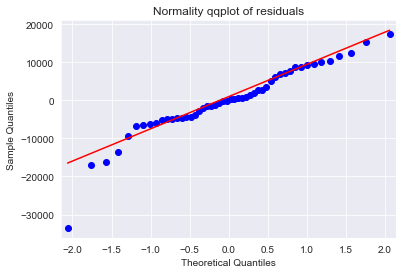

In [44]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line = "q")
plt.title("Normality qqplot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [45]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

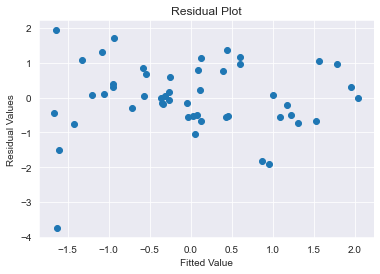

In [46]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel("Fitted Value")
plt.ylabel("Residual Values")
plt.show()

## Residuals vs Regressors

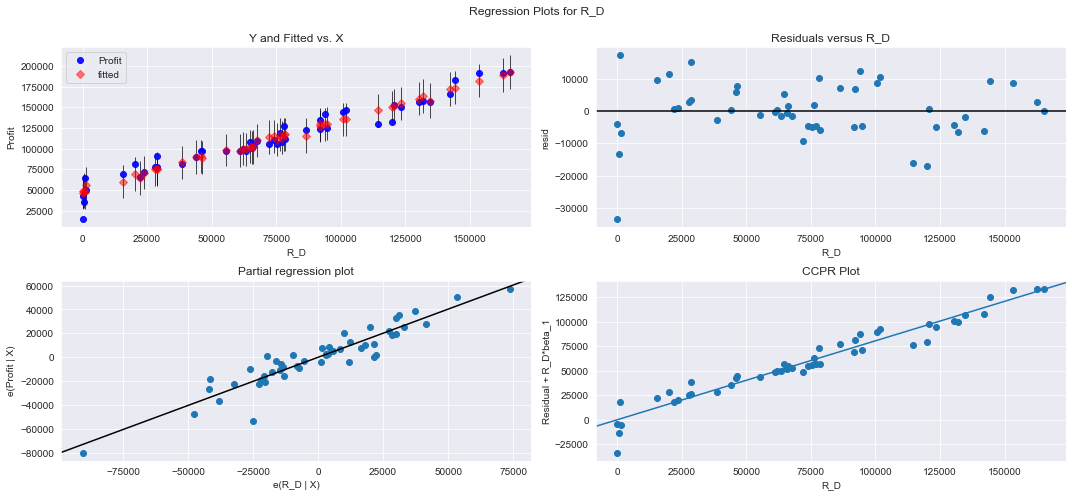

In [47]:
fig = plt.figure(figsize = (15,7))
fig = sm.graphics.plot_regress_exog(model1,"R_D",fig = fig)
plt.show()

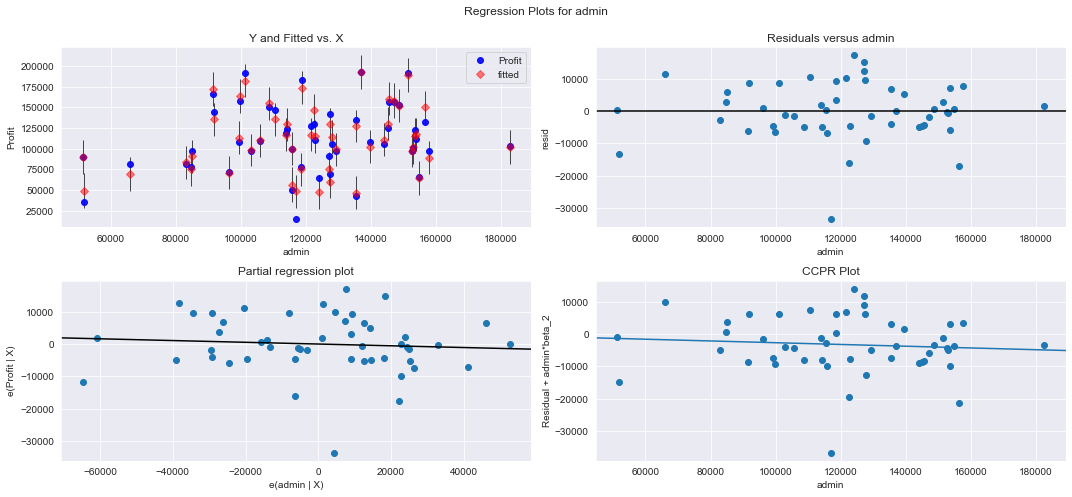

In [48]:
fig = plt.figure(figsize = (15,7))
fig = sm.graphics.plot_regress_exog(model1,"admin",fig = fig)
plt.show()

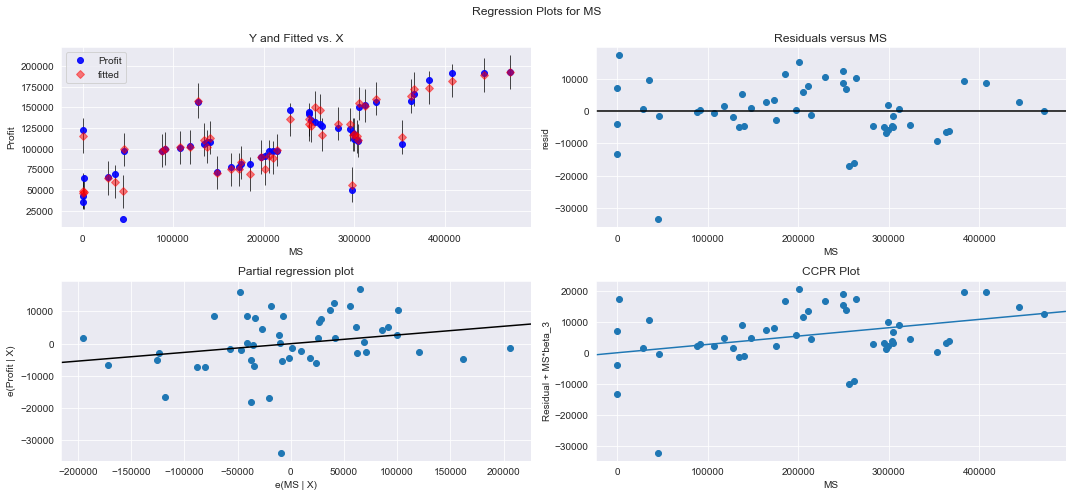

In [49]:
fig = plt.figure(figsize = (15,7))
fig = sm.graphics.plot_regress_exog(model1,"MS",fig = fig)
plt.show()

### Detecting Influencers/Outliers

### Cook's distance

In [50]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

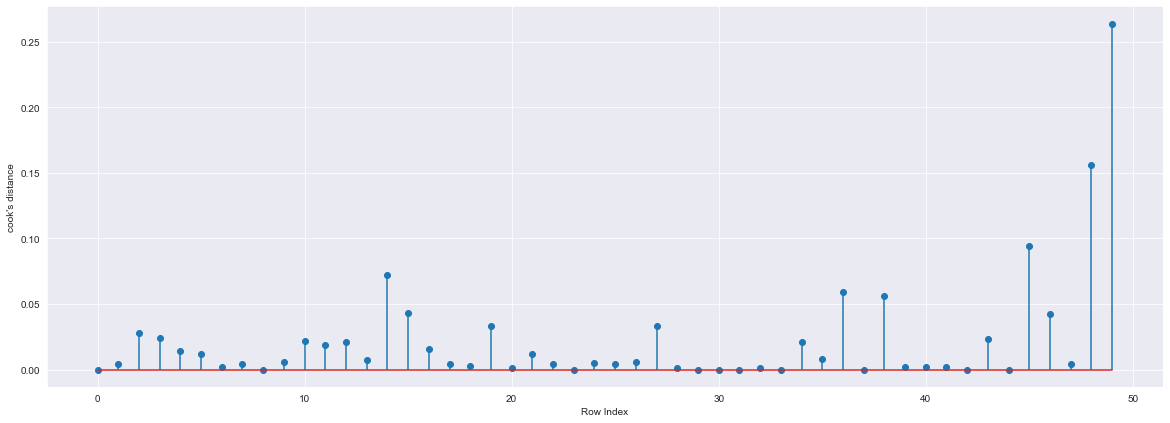

In [51]:
#plotting influencers using stem plot
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cook's distance")
plt.show()

In [52]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.26395943584950543)

In [53]:
data.tail()

,R_D,admin,MS,Profit,cal,flo
45,1000.23,124153.04,1903.93,64926.08,0,0
46,1315.46,115816.21,297114.46,49490.75,0,1
47,0.00,135426.92,0.00,42559.73,1,0
48,542.05,51743.15,0.00,35673.41,0,0
49,0.00,116983.80,45173.06,14681.40,1,0


### High influence points

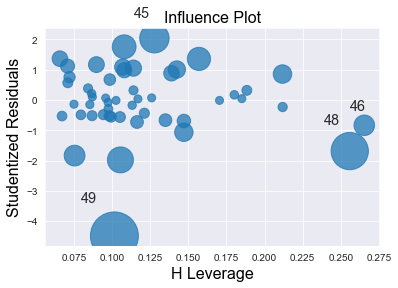

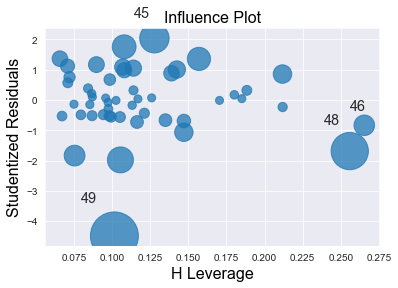

In [54]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)

- from the above plot we can se that 49th data point is having more influence

#### dropping 49th index from dataset for improving the model performance

In [55]:
data1 = data.drop(data.index[[49]],axis = 0).reset_index()
data1.drop(["index"],axis =1,inplace = True)
data1

,R_D,admin,MS,Profit,cal,flo
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


## Building the final model

In [56]:
model = smf.ols("Profit~R_D+admin+MS+cal+flo",data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.51e-29
Time:                        11:33:19   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
R_D            0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
MS             0.0258      0.014      1.804      0.078      -0.003       0.055
cal         1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
flo          389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
(model.rsquared,model.aic)

(0.9618082858227786, 1023.9380387909305)

## Predicting New data

In [58]:
#creating new dataframe for prediction
new_points = {"R_D":[152040.01,234567.10,235298.01,476315.90],"admin":[126374.1,283943.20,474830.3,939474.01],
              "MS":[173847.20,293647.34,496475.10,495638.10],"cal":[0,1,0,1],"flo":[1,0,1,1]}

In [59]:
new_data = pd.DataFrame(new_points)
new_data

,R_D,admin,MS,cal,flo
0,152040.01,126374.10,173847.20,0,1
1,234567.10,283943.20,293647.34,1,0
2,235298.01,474830.30,496475.10,0,1
3,476315.90,939474.01,495638.10,1,1


In [60]:
#model prediction
model.predict(new_data)

0    172657.821617
1    238512.721744
2    238554.675734
3    419113.559446
dtype: float64

In [61]:
data_pred = model.predict(data1)
data_pred

0     190158.286185
1     188917.339413
2     180356.022379
3     171835.121622
4     170611.039177
5     161933.895088
6     158918.600299
7     159073.187404
8     150652.118920
9     155504.737225
10    135154.667794
11    136691.955053
12    129012.886836
13    129003.663840
14    148977.165563
15    145223.746646
16    118657.325455
17    129698.996135
18    128809.413614
19    115762.021211
20    118335.175808
21    117203.470112
22    114924.439923
23    110273.368722
24    113239.472233
25    104538.867178
26    111129.014562
27    114231.691138
28    102600.701013
29    102229.270972
30    100199.636827
31     98246.061777
32    101409.986650
33     98572.020995
34     91728.442639
35     90915.064149
36     76670.864919
37     91870.126205
38     70608.331245
39     86284.488239
40     77761.930431
41     76052.890197
42     73607.243231
43     61687.603280
44     68079.899187
45     49523.991274
46     57967.070071
47     50396.799144
48     50710.448014
dtype: float64

## Comparing original vs predicted values with error

In [62]:
data1["predicted"] = model.fittedvalues
data1["error"] = data1["Profit"] - data1["predicted"]
data1

,R_D,admin,MS,Profit,cal,flo,predicted,error
0,165349.20,136897.80,471784.10,192261.83,0,0,190158.286185,2103.543815
1,162597.70,151377.59,443898.53,191792.06,1,0,188917.339413,2874.720587
2,153441.51,101145.55,407934.54,191050.39,0,1,180356.022379,10694.367621
3,144372.41,118671.85,383199.62,182901.99,0,0,171835.121622,11066.868378
4,142107.34,91391.77,366168.42,166187.94,0,1,170611.039177,-4423.099177
5,131876.90,99814.71,362861.36,156991.12,0,0,161933.895088,-4942.775088
6,134615.46,147198.87,127716.82,156122.51,1,0,158918.600299,-2796.090299
7,130298.13,145530.06,323876.68,155752.60,0,1,159073.187404,-3320.587404
8,120542.52,148718.95,311613.29,152211.77,0,0,150652.118920,1559.651080
9,123334.88,108679.17,304981.62,149759.96,1,0,155504.737225,-5744.777225
